In [1]:
from __future__ import annotations

%load_ext jupyter_black

In [2]:
import os

import mesoscaler as ms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
_local_data = os.path.abspath("../data")

urma_store = os.path.join(_local_data, "urma.zarr")
assert os.path.exists(urma_store)
era5_store = os.path.join(_local_data, "era5.zarr")
assert os.path.exists(era5_store)

In [4]:
from mesoscaler.enums import (
    # - ERA5
    GEOPOTENTIAL,
    SPECIFIC_HUMIDITY,
    TEMPERATURE,
    U_COMPONENT_OF_WIND,
    V_COMPONENT_OF_WIND,
    # - URMA
    SURFACE_PRESSURE,
    TEMPERATURE_2M,
    SPECIFIC_HUMIDITY_2M,
    U_WIND_COMPONENT_10M,
    V_WIND_COMPONENT_10M,
    SURFACE_PRESSURE,
)

era5_dvars = [
    GEOPOTENTIAL,
    TEMPERATURE,
    SPECIFIC_HUMIDITY,
    U_COMPONENT_OF_WIND,
    V_COMPONENT_OF_WIND,
]

urma_dvars = [
    SURFACE_PRESSURE,
    TEMPERATURE_2M,
    SPECIFIC_HUMIDITY_2M,
    U_WIND_COMPONENT_10M,
    V_WIND_COMPONENT_10M,
]

dataset_sequence = ms.open_datasets([(urma_store, urma_dvars), (era5_store, era5_dvars)])
dataset_sequence

/home/leaver/mesoscaler/.venv/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


DatasetSequence(size=2)[
<xarray.DependentDataset>
Dimensions:               (Y: 1597, X: 2345, T: 24, Z: 1)
Coordinates:
    latitude              (Y, X) float64 19.23 19.23 19.24 ... 54.38 54.38 54.37
    longitude             (Y, X) float64 233.7 233.7 233.8 ... 300.9 300.9 301.0
  * time                  (T) datetime64[ns] 2019-01-01T03:00:00 ... 2019-01-...
  * vertical              (Z) float64 1.013e+03
Dimensions without coordinates: Y, X, T, Z
Data variables:
    specific_humidity_2m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    surface_pressure      (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    temperature_2m        (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    u_wind_component_10m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    v_wind_component_10m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
Attributes:
    depends:  Dependencies(URMA)
<xarray.DependentDataset>
Dimensions:              (T: 25, Z: 23, Y: 721, X: 1440)
Coordinates:
    latitude             (Y, X) float32 90.0 90.0 90.0 ... -90.0 -90.0 -90.0
  * vertical             (Z) int64 200 225 250 300 350 ... 900 925 950 975 1000
    longitude            (Y, X) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time                 (T) datetime64[ns] 2019-01-01 ... 2019-01-02
Dimensions without coordinates: T, Z, Y, X
Data variables:
    geopotential         (T, Z, Y, X) float32 dask.array<chunksize=(1, 23, 721, 1440), meta=np.ndarray>
    specific_humidity    (T, Z, Y, X) float32 dask.array<chunksize=(1, 23, 721, 1440), meta=np.ndarray>
    temperature          (T, Z, Y, X) float32 dask.array<chunksize=(1, 23, 721, 1440), meta=np.ndarray>
    u_component_of_wind  (T, Z, Y, X) float32 dask.array<chunksize=(1, 23, 721, 1440), meta=np.ndarray>
    v_component_of_wind  (T, Z, Y, X) float32 dask.array<chunksize=(1, 23, 721, 1440), meta=np.ndarray>
Attributes:
    depends:  Dependencies(ERA5)
]

# Mesoscale

In meteorology mesoscale is a scale of atmospheric motion smaller than synoptic scale but larger than microscale and is
considered to be between 2 and 200 kilometers and includes phenomena such as sea breezes and lake-effect snowstorms.
Specifically this application targets mesoscale-beta which is 20-200 km.


> Meso-beta 20–200 km scale of phenomena like sea breezes, lake effect snow storms

The resampling methods target a `~200km` surface extent at a `2.5km` resolution, this results in an image size of `80x80` pixels.

height=40 width=80 dx=200 dy=100, (80.0, 40.0)


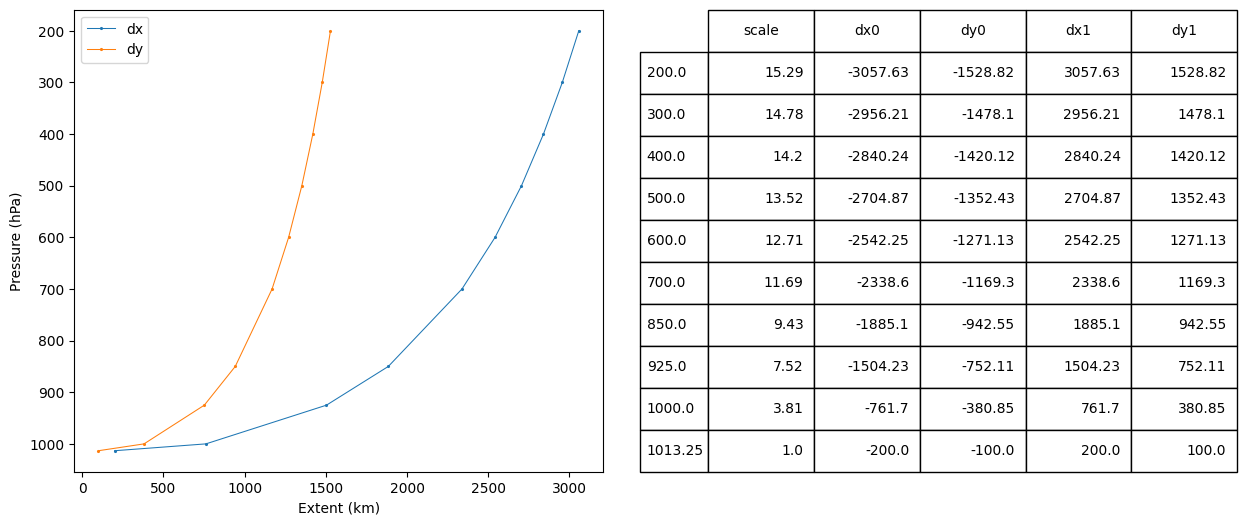

In [8]:
ratio = 2 / 1
urma_grid_resolution = 2.5  # km
height = 40  # px
dy = 100  # km
dx = int(dy * ratio)  # km
width = int(height * ratio)  # px
levels = [1013.25, 1000, 925, 850, 700, 600, 500, 400, 300, 200]

scale = ms.Mesoscale(dx, dy, levels=levels)
scale.plot.table()

print(f"{height=} {width=} {dx=} {dy=}, {dx // urma_grid_resolution, dy // urma_grid_resolution}")
plt.show()

In [10]:
domain = scale.get_domain(dataset_sequence)
domain

Domain:
-  bbox: BoundingBox(west=-138.37319928236172, south=19.228975999999996, east=-59.042147941577866, north=57.08856116148375)
-  time: ['2019-01-01T00:00:00.000000000' '2019-01-01T01:00:00.000000000' '2019-01-01T02:00:00.000000000'
 '2019-01-01T03:00:00.000000000' '2019-01-01T04:00:00.000000000' '2019-01-01T05:00:00.000000000'
 '2019-01-01T06:00:00.000000000' '2019-01-01T07:00:00.000000000' '2019-01-01T08:00:00.000000000'
 '2019-01-01T09:00:00.000000000' '2019-01-01T10:00:00.000000000' '2019-01-01T11:00:00.000000000'
 '2019-01-01T12:00:00.000000000' '2019-01-01T13:00:00.000000000' '2019-01-01T14:00:00.000000000'
 '2019-01-01T15:00:00.000000000' '2019-01-01T16:00:00.000000000' '2019-01-01T17:00:00.000000000'
 '2019-01-01T18:00:00.000000000' '2019-01-01T19:00:00.000000000' '2019-01-01T20:00:00.000000000'
 '2019-01-01T21:00:00.000000000' '2019-01-01T22:00:00.000000000' '2019-01-01T23:00:00.000000000']
- scale: 
  Mesoscale(size=10):
  -       scale: [ 1.00  3.81  7.52  9.43 11.69 12

In [11]:
area_of_interest = -120, 30, -70, 25

sampler = ms.AreaOfInterestSampler(domain, aoi=area_of_interest)
sampler

AreaOfInterestSampler[
((-120.0, 30.0), ['2019-01-01T00:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T01:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T02:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T03:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T04:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T05:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T06:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T07:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T08:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T09:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T10:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T11:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T12:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T13:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T14:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T15:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T16:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T17:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T18:00:00.00

In [13]:
partial = ms.AreaOfInterestSampler.partial(aoi=area_of_interest, time_batch_size=6)
partial(domain)

AreaOfInterestSampler[
((-120.0, 30.0), ['2019-01-01T00:00:00.000000000' '2019-01-01T01:00:00.000000000' '2019-01-01T02:00:00.000000000'
 '2019-01-01T03:00:00.000000000' '2019-01-01T04:00:00.000000000' '2019-01-01T05:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T06:00:00.000000000' '2019-01-01T07:00:00.000000000' '2019-01-01T08:00:00.000000000'
 '2019-01-01T09:00:00.000000000' '2019-01-01T10:00:00.000000000' '2019-01-01T11:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T12:00:00.000000000' '2019-01-01T13:00:00.000000000' '2019-01-01T14:00:00.000000000'
 '2019-01-01T15:00:00.000000000' '2019-01-01T16:00:00.000000000' '2019-01-01T17:00:00.000000000'])
((-120.0, 30.0), ['2019-01-01T18:00:00.000000000' '2019-01-01T19:00:00.000000000' '2019-01-01T20:00:00.000000000'
 '2019-01-01T21:00:00.000000000' '2019-01-01T22:00:00.000000000' '2019-01-01T23:00:00.000000000'])
((-120.0, 28.75), ['2019-01-01T00:00:00.000000000' '2019-01-01T01:00:00.000000000' '2019-01-01T02:00:00.000000000'
 '2019-01-

In [14]:
resampler = scale.resample(dataset_sequence, height=height, width=width)

In [16]:
texas = -106.6, 25.8, -93.5, 36.5
for (lon, lat), time in ms.AreaOfInterestSampler(domain, aoi=texas, time_batch_size=6):
    array = resampler.__call__(lon, lat, time)
    print(array.shape)
    break

(5, 6, 10, 40, 80)


In [18]:
producer = ms.create.producer(
    dataset_sequence,
    ms.AreaOfInterestSampler.partial(aoi=area_of_interest, time_batch_size=1),
    height=height,
    width=width,
    dx=dx,
    dy=dy,
).shuffle(seed=0)

for (lon, lat), time in producer:
    print(producer.get_array(lon, lat, time))
    break

<xarray.DataArray (variables: 5, T: 1, Z: 6, Y: 40, X: 80)>
array([[[[[ 1.66599993e-02,  1.66870002e-02,  1.67510007e-02, ...,
            1.37930000e-02,  1.41470004e-02,  1.43630002e-02],
          [ 1.68009996e-02,  1.67200007e-02,  1.67469997e-02, ...,
            1.37510002e-02,  1.41660003e-02,  1.42759997e-02],
          [ 1.68030001e-02,  1.68660004e-02,  1.67479999e-02, ...,
            1.38529995e-02,  1.40429996e-02,  1.43370004e-02],
          ...,
          [ 1.70000009e-02,  1.69569999e-02,  1.69430003e-02, ...,
            1.45180002e-02,  1.44699998e-02,  1.45600000e-02],
          [ 1.70000009e-02,  1.69619992e-02,  1.69450007e-02, ...,
            1.45530002e-02,  1.45399999e-02,  1.45309996e-02],
          [ 1.69939995e-02,  1.69590004e-02,  1.69500001e-02, ...,
            1.46300001e-02,  1.46159995e-02,  1.45709999e-02]],

         [[ 7.84098291e+03,  7.84204297e+03,  7.84486865e+03, ...,
            8.48957617e+03,  8.48710352e+03,  8.48439453e+03],
          [ 7

In [20]:
for batch in ms.create.loader(
    dataset_sequence,
    ms.AreaOfInterestSampler.partial(aoi=area_of_interest, time_batch_size=2),
    dx=dx,
    dy=dy,
    height=height,
    width=width,
    batch_size=5,
):
    print(batch.shape)
    break

torch.Size([5, 5, 2, 6, 40, 80])
